In [171]:
# import packages
import os
import re
import numpy as np
from numpy.fft import fft, fftshift
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
import datetime as dt
%run utils/helper_functions
%run utils/nmr_objects
%run utils/config

# from utils.helper_functions import *
# from utils.nmr_objects import NMRObject

In [122]:
# find_scan_gain(file_path)
# find_protocol_name(file_path)
x = find_scan_time(file_path)
y = dt.datetime.now()

z = y-x
z.seconds/60

340.1166666666667

In [176]:
# main_path = '/Users/mehipour/Downloads/Bruker 3/Perfusion/'
main_path = DATA_DIRECTORY
good_rats = [20, 21, 22, 23, 24, 25, 32, 44, 35, 36, 37]

    # path = main_path + directory
    # print(os.listdir(path))
paths = find_all_protocols(main_path, good_rats)

paths[good_rats[0]][0]

'/Volumes/Freedom 7/Work/UPenn/Other Data/Bruker/Bruker 3/Perfusion//20191015-Rat20/20191015_201544_20191015_perfusion_31P_baseline_rat20_1_1/10'

In [37]:
file_path = DATA_DIRECTORY + '20200817-Rat36/20200817_192052_31P_control_rat36_1_1/' + '3'
c = read_complex_fid(file_path, drop_points=POINTS_TO_REMOVE)

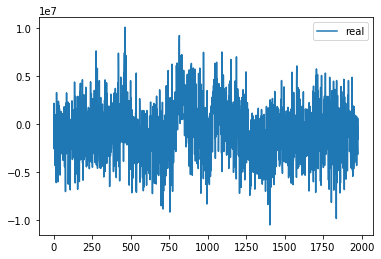

In [38]:
a = NMRObject(c)
a.sw = SW_HZ
a.show_real_spectrum()

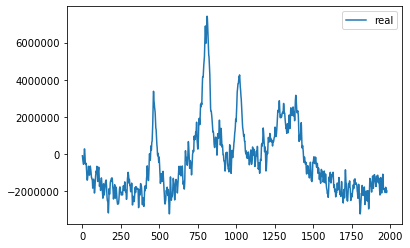

In [39]:
# Let's phase the spectrum
a.line_broad(60)
a.phase(-1.81, -0.0044)
a.show_real_spectrum()


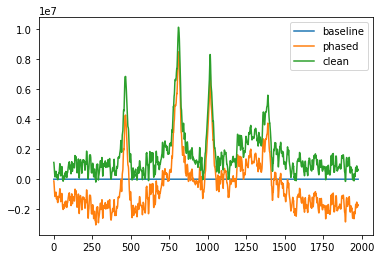

In [36]:
peak_idx = list(np.arange(350,550)) + list(np.arange(750,850)) + list(np.arange(950,1100)) + list(np.arange(1250,1500))

a.remove_baseline(24)
plt.plot(a.baseline, label='baseline')
plt.plot(a.phased_spectrum, label='phased')
plt.plot(a.clean_spectrum, label='clean')
plt.legend()
plt.show()

In [50]:
# phase spectrum, used for itneractive phasing
def phase_spectrum(ph0, ph1):
    ''' function that's passed on to the interactive object for phasing.

    Args:
        spec_obj::[NMRObject]
            spectrum object
        ph0::[float]
            zero-order phase
        ph1::[float]
            first order phase
    '''
    c = NMRObject(read_complex_fid(file_path))
    a.phase(ph0, ph1/100)
    a.show_real_spectrum()

interactive_plot = interactive(phase_spectrum,
                            ph0=(-pi, pi, pi/360),
                            ph1=(-pi, pi, pi/50))
output = interactive_plot.children[-1]
print(output)
output.layout.height = '350px'
interactive_plot




Output()


interactive(children=(FloatSlider(value=0.0, description='ph0', max=3.141592653589793, min=-3.141592653589793,…

In [172]:
# fid object (done)
    # fid
    # spectrum
    # phase
    # line broadening

# read bruker file (done)

# identify bruker experiments
 
# interactive phasing (done)

# baseline removal (almost done)

# quantification of metabolites

# store parameters in a pandas table, and in a csv file.